In [214]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [215]:
from tqdm import tqdm

In [216]:
import pandas as pd
studies_csv = pd.read_csv('../raw_data/Updated_Artist_studies_master_1_Jun_2022.csv')
studies_df = studies_csv.copy()
studies_df.shape

(3408, 11)

In [217]:
studies_df.fillna("", inplace = True)

In [218]:
studies_df.shape

(3408, 11)

In [219]:
studies_df.columns = ['l_name', 'f_name',
       'style_represented', 'complete', 'user', 'sgl_img_folder',
       'cards_folder', 'batch_id', 'non_visual',
       'style_or_effect', 'notes']

In [220]:
# filter out styles and non visual artists
artist_df = studies_df[studies_df['complete'].str.contains('x') &
                       ~studies_df['non_visual'].str.contains('x') &
                       ~studies_df['style_or_effect'].str.contains('x')]


In [221]:
artists_interest_df = artist_df[artist_df['batch_id'] == 1.0]
len(artists_interest_df)

142

In [222]:
artists_interest_df.loc[:, 'key'] = artists_interest_df.apply(lambda row: f"{row['f_name']} {row['l_name']}", axis = 1).str.replace(' ', '_')

artists_interest_df.loc[:, 'prompt'] = artists_interest_df.apply(lambda row: f"{row['f_name']} {row['l_name']}", axis = 1)

/Users/alecsharp/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [223]:
import clip
import numpy as np
model, preprocess = clip.load("ViT-B/32", device='cpu', jit=False)

In [224]:
artist_embed_list = []
for artist in tqdm(artists_interest_df.prompt):

    text_input = clip.tokenize(f'A beautiful painting of a building in a serene landscape, {artist}, Trending on artstation').to('cpu')
    #print(text_input.shape)
    text_embs = model.encode_text(text_input).float()
    #text_embs = text_embs / text_embs.norm(dim=-1, keepdim=True)
    #print(text_embs.shape)
    artist_embed_list.append(text_embs.detach().numpy())

embed_df = pd.DataFrame(np.squeeze(artist_embed_list))

100%|█████████████████████████████████████████| 142/142 [00:19<00:00,  7.22it/s]


In [225]:
embed_df

0         1         2         3         4         5         6    \
0    0.373642 -0.298452  0.522480  0.679346 -0.094025 -0.304664  0.017958   
1    0.548089 -0.755787 -0.025097  0.037878 -0.174384 -0.436749 -0.038724   
2    0.542203 -0.269848 -0.257304  0.022946  0.226707 -0.507487 -0.022045   
3    0.242323 -0.332777 -0.161022  0.061443 -0.087654 -0.024364  0.075642   
4    0.440283 -0.386635 -0.288009  0.272903  0.129058  0.054376 -0.163809   
..        ...       ...       ...       ...       ...       ...       ...   
137  0.527923 -0.363578 -0.193876  0.160542 -0.139457 -0.452748  0.008163   
138  0.565818 -0.296533 -0.179747  0.294809 -0.090461 -0.322031  0.066956   
139  0.577942 -0.409797 -0.222765  0.112333 -0.078562 -0.241520  0.098003   
140  0.658962 -0.448243 -0.160306  0.026833  0.201824 -0.135464  0.053681   
141  0.549988 -0.377120 -0.286066  0.086267 -0.112730 -0.285764  0.035541   

          7         8         9    ...       502       503       504  \
0    0.407751  0.166322  0.288486  ...  0.165910  0.099057  0.684855   
1    0.428354  0.073337  0.157434  ... -0.041813 -0.146982  0.721906   
2    0.291551  0.246280  0.022707  ... -0.286295 -0.008185  1.248325   
3    0.295348 -0.452175 -0.024817  ... -0.205149 -0.256429  0.999849   
4    0.096510  0.101642  0.263201  ... -0.168359 -0.254850  0.734866   
..        ...       ...       ...  ...       ...       ...       ...   
137  0.389423 -0.046278 -0.131003  ... -0.128636 -0.119561  0.761727   
138  0.108589  0.096040 -0.058183  ... -0.203880 -0.263412  0.814030   
139  0.553825 -0.062634 -0.040810  ... -0.115592 -0.101475  0.859583   
140  0.557190 -0.019016  0.056962  ... -0.008506  0.133886  0.933198   
141  0.647010 -0.196990 -0.032849  ... -0.051314 -0.139752  0.759176   

          505       506       507       508       509       510       511  
0    0.314616  0.107784  0.095817  0.327766 -0.180999  0.067163 -0.463511  
1   -0.018872 -0.165156  0.026381  0.175386 -0.379610  0.151163 -0.015089  
2    0.125620 -0.167813 -0.078410  0.276716 -0.497846 -0.002430 -0.198668  
3   -0.125575 -0.058035 -0.031397  0.231301 -0.384243 -0.045517 -0.083841  
4   -0.442115 -0.109047 -0.079858  0.420503 -0.287745  0.101379 -0.263585  
..        ...       ...       ...       ...       ...       ...       ...  
137  0.101771 -0.085114  0.149429  0.334611 -0.668735 -0.231014 -0.060635  
138 -0.032055 -0.093496  0.178712  0.440996 -0.777846 -0.193899 -0.048821  
139  0.014270 -0.080312  0.315029  0.454427 -0.901463 -0.095441 -0.030320  
140  0.247295 -0.035467  0.172059  0.481364 -0.876344  0.073538 -0.073008  
141  0.087386 -0.082551  0.178395  0.530091 -0.927154 -0.192148 -0.119419  

[142 rows x 512 columns]

In [226]:
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(embed_df)

In [227]:
sim_matrix.shape

(142, 142)

In [228]:
np.argsort(sim_matrix)[:, -2]

array([ 81,  15, 108, 114,  67, 134, 121,  73,   4,  73,  73, 106,  13,
        12,  67,  24,  74,  35, 107,  35,  88,  53,  76, 134,  68,  30,
        30,  35,  56,  46, 122,  27, 131, 110,  65, 101,  80,  67,  76,
       139, 140, 119,  49, 138,  92, 139,  74, 134,  27,  65,  52,  89,
        23,  67,   4,  80, 128, 140, 117, 121,  79, 126, 140, 135,  98,
       140,  28,  53,  59,  43,  79,  76,  71, 117,  75,  74,  58,  32,
        88,  38,  55,  76,  67,  73, 107,  73,  56,  24, 106,  77, 117,
        89, 141,  65,  73,  47,  11, 113, 106,  30,  33, 122, 138,  76,
        73,  49, 113,  84, 106, 136, 139,  84, 123,  58, 124, 116, 115,
       121, 134, 129, 110, 117, 131, 114, 114, 131, 139,  33, 114, 119,
       120, 122, 138,  73, 124, 117, 114,  58, 132, 110, 139, 120])

In [229]:
np.unravel_index(np.argmax(sim_matrix), shape = (142, 142))

(33, 33)

In [230]:
sim_matrix[33, 33]

1.0000005

In [231]:
# base prompt
control_input = clip.tokenize(f'A beautiful painting of a building in a serene landscape, Trending on artstation').to('cpu')
control_embs = model.encode_text(text_input).float().detach().numpy()
#text_embs = text_embs / text_embs.norm(dim=-1, keepdim=True)

In [232]:
# calculate other distances too, would need to normalise the data

control_dist = cosine_similarity(embed_df, control_embs)

In [38]:
artists_interest_df['dist'] = control_dist

array([[0.42673326],
       [0.71904767],
       [0.7440667 ],
       [0.7947376 ],
       [0.655489  ],
       [0.74994946],
       [0.7288668 ],
       [0.75751483],
       [0.61326075],
       [0.7304691 ],
       [0.72863543],
       [0.7130869 ],
       [0.47381774],
       [0.5560042 ],
       [0.58988714],
       [0.6830511 ],
       [0.6944836 ],
       [0.754545  ],
       [0.58903486],
       [0.7622088 ],
       [0.7478337 ],
       [0.7083974 ],
       [0.8537363 ],
       [0.8064914 ],
       [0.7023117 ],
       [0.666154  ],
       [0.6772127 ],
       [0.68894255],
       [0.7507744 ],
       [0.6880668 ],
       [0.81010294],
       [0.52614176],
       [0.8185829 ],
       [0.94900155],
       [0.6773583 ],
       [0.8010183 ],
       [0.5120131 ],
       [0.5621529 ],
       [0.8573421 ],
       [0.7701493 ],
       [0.703611  ],
       [0.82035965],
       [0.5136199 ],
       [0.7950934 ],
       [0.68034863],
       [0.7770818 ],
       [0.71570385],
       [0.789

In [233]:
most_influence_idx = np.argsort(control_dist.reshape(-1))[:16]
least_influence_idx = np.argsort(control_dist.reshape(-1))[-16:]

In [234]:
from artist_studies.loader import ArtLoader 

In [5]:
art_loader = ArtLoader()

# load data

exclude = ['styles single images', 'non-visual artist single images', '1. styles', '2. not recognized']

art_loader.get_image_folders(data_path = '../raw_data/batch 1',
                             #data_path = 'drive/My Drive/datasets/artist_studies/batch 1',
                             exclude_list = exclude,
                             num_artists = None, 
                             preprocessor = None)

100%|█████████████████████████████████████████| 142/142 [02:24<00:00,  1.02s/it]


In [44]:
# artists have a varying number of works
np.unique(art_loader.artist_list, return_counts=True)

(array(['Aivazovsky_Ivan', 'Al_Gazzar_Abdel_Hadi', 'Al_Halyan_Moosa',
        'Amano_Yoshitaka', 'Anderson_Wes', 'Andrews_Esao',
        'Arcimboldo_Giuseppe', 'Audubon_JohnJames', 'Bacon_Francis',
        'Baizley_John', 'Bak_Karol', 'Banksy', 'Barra_Didier',
        'Basquiat_Jean-Michel', 'Beeple', 'Beksinski_Zdzislaw',
        'Beksinski_Zdzislaw-sp', 'Berkey_John', 'Bierstadt_Albert',
        'Bilibin_Ivan', 'Bogen_Alexander', 'Bosch_Hieronymous',
        'Bosschart_Jofra', 'Botticelli_Sandro', 'Bradley_Noah',
        'Britenbucher_Renie', 'Brom_Gerald', 'Burns_Jim', 'Caravaggio',
        'Chebokha_Artem', 'Cole_Thomas', 'Constable_John',
        'Copley_William', 'Corot_Camille', 'Crane_Walter', 'Dali_Salvador',
        'Darrow_Geof', 'De_Nome_Francois', 'Delacroix_Eugene',
        'Delvaux_Paul', 'Delville_Jean', 'Desiderio_Monsu',
        'DiFate_Vincent', 'Dottori_Gerardo', 'Duchamp_Marcel',
        'Dulac_Edmund', 'Dulac_Germaine', 'Dulbecco_Gian_Paolo',
        'Durán_Victo

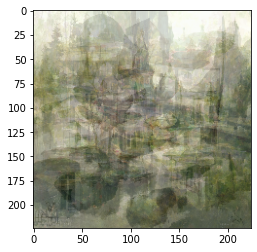

In [55]:
# average of all an artists works
import matplotlib.pyplot as plt
plt.imshow(np.mean(art_loader.array_art_list[:6] / 255, axis = 0))

In [235]:
from unidecode import unidecode

def sort_strings_in_array(string_array):
    return np.array(["".join(sorted(unidecode(x))) for x in string_array])

def get_example_art(artist_key, kind = 'array'):
    idx = np.argwhere(sort_strings_in_array(art_loader.artist_list) == "".join(sorted(unidecode(artist_key)))).reshape(-1)
    if len(idx) < 1:
        return np.zeros((224, 224, 3))
    # just select first image
    idx = idx[0]
    if kind == 'image':
        return art_loader.art_list[idx]
    else:
        return art_loader.array_art_list[idx]/255

In [195]:
sort_strings_in_array(art_loader.artist_list) == "".join(sorted('Hilma_af_Klint'))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [196]:
artists_interest_df.head()

l_name     f_name style_represented complete         user  \
9     af Klint      Hilma               Yes        x   proximasan   
13  Aivazovsky       Ivan               Yes        x  KyrickYoung   
17       Amano  Yoshitaka               Yes        x    EErratica   
20    Anderson        Wes               Yes        x    EErratica   
21     Andrews       Esao               Yes        x   sureailabs   

   sgl_img_folder cards_folder batch_id non_visual style_or_effect notes  \
9               x            x      1.0          -               -         
13              x            x      1.0          -               -         
17              x            x      1.0          -               -         
20              x            x      1.0          -               -         
21              x            x      1.0          -               -         

                key           prompt      dist  
9    Hilma_af_Klint   Hilma af Klint  0.426733  
13  Ivan_Aivazovsky  Ivan Aivazovsky  0.719048  
17  Yoshitaka_Amano  Yoshitaka Amano  0.744067  
20     Wes_Anderson     Wes Anderson  0.794738  
21     Esao_Andrews     Esao Andrews  0.655489

In [197]:
# Key
artists_interest_df.key[artists_interest_df.key.str.contains("Juan")]

1310    Juan_Giménez
Name: key, dtype: object

In [244]:
# Folder names
pd.Series(np.unique([name for name in art_loader.artist_list if "Vincent" in name]))

0      DiFate_Vincent
1    Gogh_Vincent_Van
dtype: object

In [199]:
unidecode('Juan_Giménez')

'Juan_Gimenez'

In [245]:
artists_interest_df['path'] = artists_interest_df['key'].copy()

/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_24603/3284048176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_interest_df['path'] = artists_interest_df['key'].copy()


In [246]:
# manually changing some Keys to match folder names
artists_interest_df['path']  = artists_interest_df['path'].str.replace("Vincent_Di_Fate", "DiFate_Vincent")\
.str.replace('Zdzisław_Beksiński', 'Beksinski_Zdzislaw-sp')\
#.str.replace('', 'Juan_Giménez')
                

/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_24603/2007532645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_interest_df['path']  = artists_interest_df['path'].str.replace("Vincent_Di_Fate", "DiFate_Vincent")\


In [247]:
most_influence_artists = artists_interest_df.iloc[most_influence_idx][['path', 'key']]
least_influence_artists = artists_interest_df.iloc[least_influence_idx][['path','key']]

In [248]:
least_influence_artists

path                key
1258     William_Copley     William_Copley
1427        Lisa_Parker        Lisa_Parker
1310       Juan_Giménez       Juan_Giménez
768           Amir_Zand          Amir_Zand
1189      Adam_Paquette      Adam_Paquette
1229       Didier_Barra       Didier_Barra
1378    Arman_Manookian    Arman_Manookian
1280    Victorina_Durán    Victorina_Durán
1276    Gerardo_Dottori    Gerardo_Dottori
1203    Esteban_Vicente    Esteban_Vicente
194      DiFate_Vincent    Vincent_Di_Fate
1471   Wojciech_Siudmak   Wojciech_Siudmak
1157    Alexander_Bogen    Alexander_Bogen
1283    Karine_Eibatova    Karine_Eibatova
1256     Artem_Chebokha     Artem_Chebokha
1501  Dmitry_Vishnevsky  Dmitry_Vishnevsky

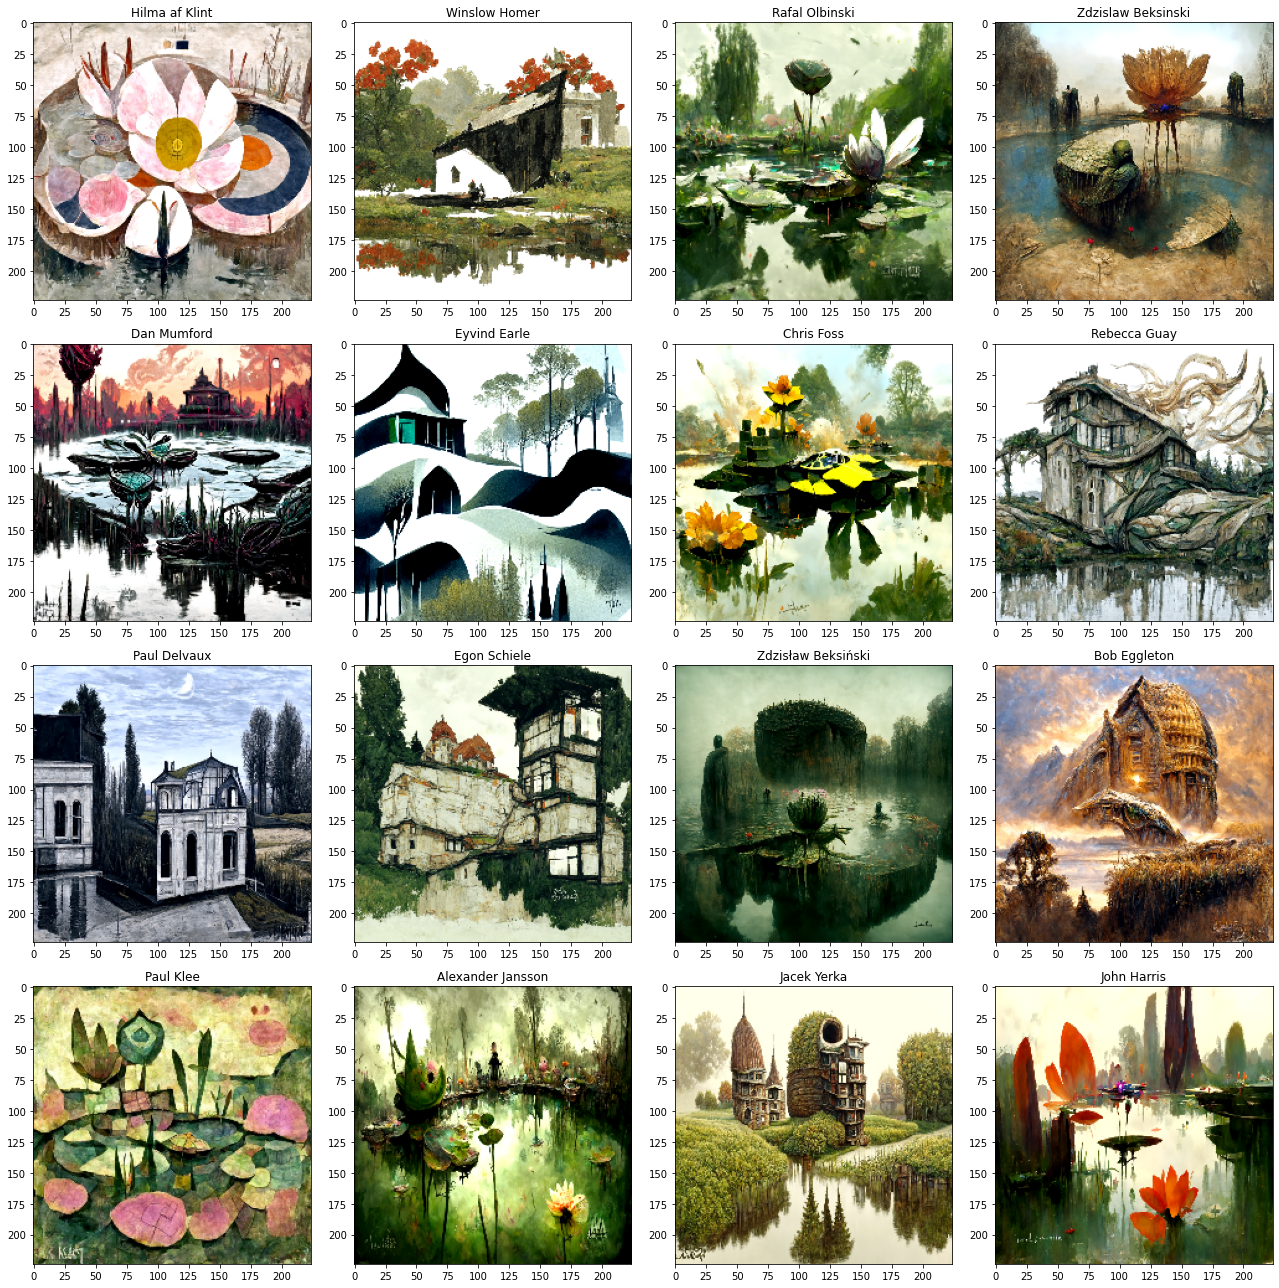

In [249]:
fig, axes = plt.subplots(4, 4, figsize = (18, 18))

for ax, artist_key, artist_path in zip(axes.flat, most_influence_artists.key, most_influence_artists.path):
    ax.imshow(get_example_art(artist_path, kind = 'array'))
    ax.set_title(f'{artist_key.replace("_", " ")}')
plt.tight_layout()

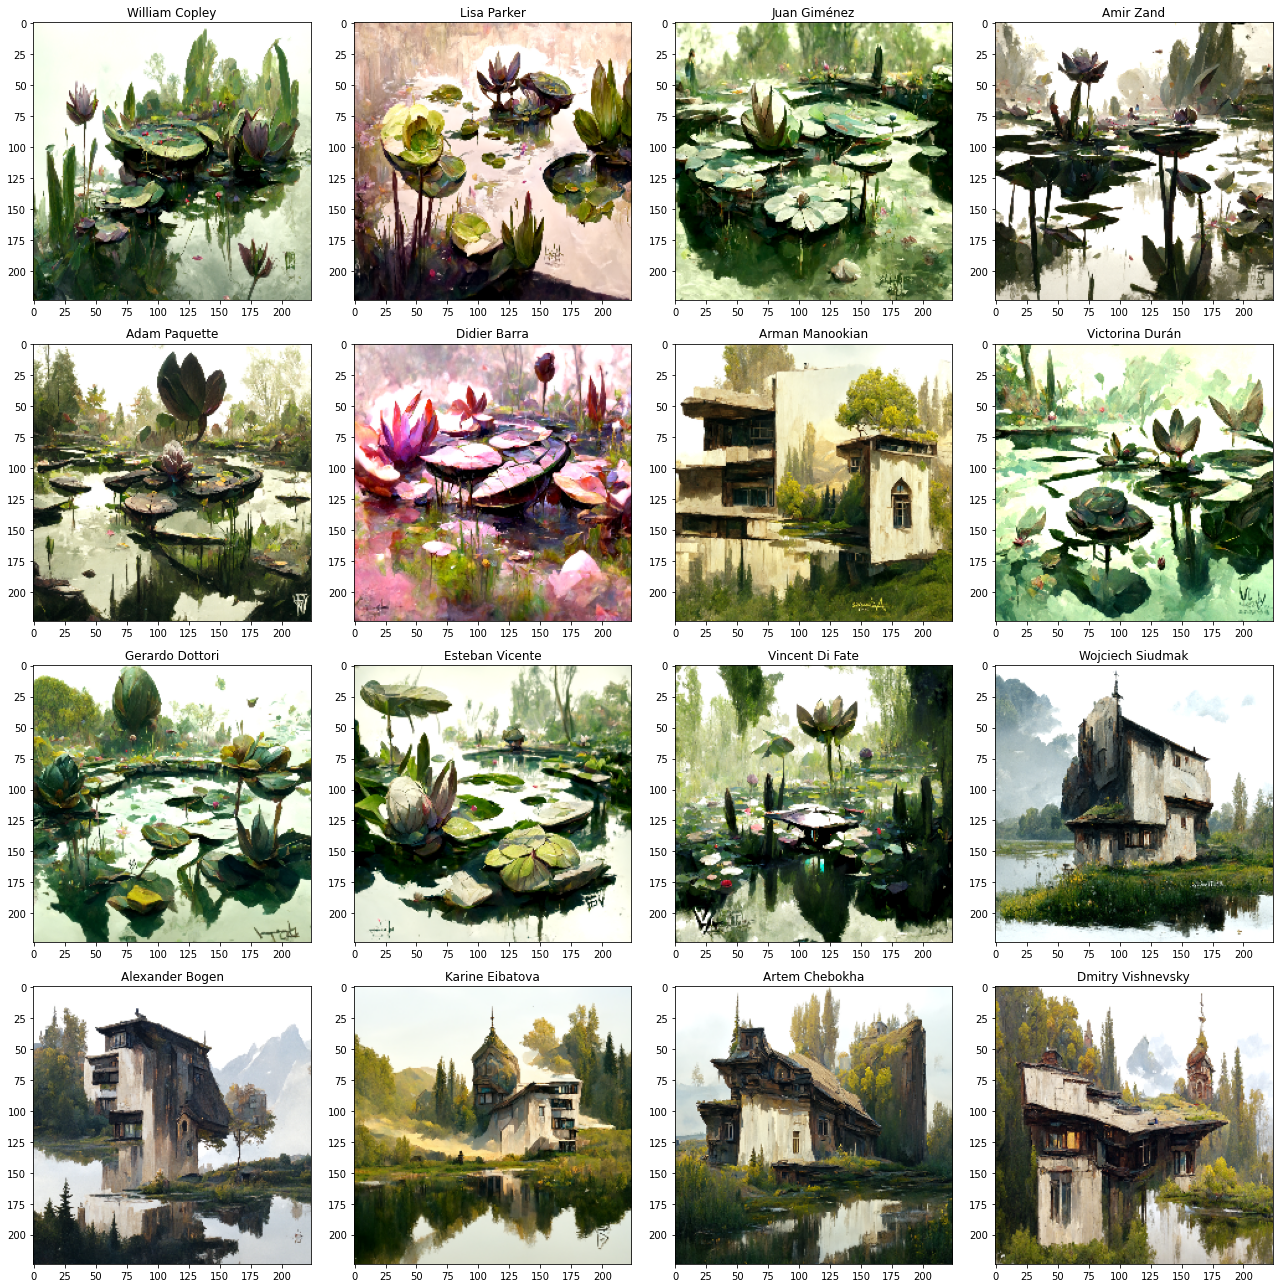

In [250]:
fig, axes = plt.subplots(4, 4, figsize = (18, 18))

for ax, artist_key, artist_path in zip(axes.flat, least_influence_artists.key, least_influence_artists.path):
    ax.imshow(get_example_art(artist_path, kind = 'array'))
    ax.set_title(f'{artist_key.replace("_", " ")}')
plt.tight_layout()

In [91]:
show_xy_images(x_coords = , y_coords = , img_list = example_art)

SyntaxError: invalid syntax (4038386603.py, line 1)